In [10]:
from config import *

import gensim

import glob
import os
import re

import numpy as np
import pandas as pd

import json

In [11]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim.models import ldamodel

In [12]:
THEME = 'Inflation'
theme = 'Inflation'

In [13]:
# Load dictionary and corpus
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))

2021-04-26 00:26:35,433 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.dict
2021-04-26 00:26:35,437 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.dict', 'datetime': '2021-04-26T00:26:35.437710', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}


In [14]:
# 1. Look for ids of related words to theme in the dictionary

In [15]:
words = pd.read_csv(TEMP_PATH + '/%s_words.csv' % THEME.lower(), index_col=0)

In [16]:
year_name_list = dict()
year_id_list = dict()
for col in words.columns:
    reqd_words = list(words[col].values) + [THEME.lower()]
    reqd_ids = [k for k,v in dictionary_all.items() if v in reqd_words]
    year_name_list[col] = [dictionary_all[i] for i in reqd_ids]
    year_id_list[col] = reqd_ids

In [17]:
year_name_list

{'1996': ['inflation',
  'gdp',
  'unemployment',
  'pressures',
  'wage',
  'cpi',
  'economy'],
 '1997': ['inflation', 'unemployment', 'pressures', 'wage', 'cpi', 'economy'],
 '1998': ['inflation', 'gdp', 'unemployment', 'wage', 'cpi', 'economy'],
 '1999': ['inflation', 'gdp', 'wage', 'cpi', 'economy'],
 '2000': ['inflation', 'gdp', 'pressures', 'wage', 'cpi', 'economy'],
 '2001': ['inflation',
  'gdp',
  'unemployment',
  'cpi',
  'ecb',
  'growth',
  'economy'],
 '2002': ['inflation', 'gdp', 'cpi', 'ecb', 'economy'],
 '2003': ['inflation',
  'fed',
  'gdp',
  'payrolls',
  'cpi',
  'policymakers',
  'ecb',
  'economy'],
 '2004': ['inflation',
  'fed',
  'gdp',
  'payrolls',
  'cpi',
  'greenspan',
  'bernanke'],
 '2005': ['easing', 'inflation', 'fed', 'gdp', 'payrolls', 'cpi', 'greenspan'],
 '2006': ['inflation', 'fed', 'gdp', 'payrolls', 'cpi', 'bernanke'],
 '2007': ['easing',
  'inflation',
  'fed',
  'gdp',
  'recession',
  'cpi',
  'policymakers',
  'tightening'],
 '2008': ['ea

In [18]:
years = [str(year) for year in range(START_YEAR, END_YEAR + 1)]

In [19]:
good_words_count_per_year = dict()
for year in years:
    good_words_count_per_year[year] = []
    with open(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year)) as f:
        a = json.load(f)
        for article in a:
            good_words_count_per_year[year].append(len([word for word in article if word in year_name_list[year]]))
    print(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year), 'done!')

/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1996.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1997.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1998.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1999.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2000.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2001.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2002.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2003.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2004.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2005.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2006.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2007.json done!
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2008.json done!

In [20]:
yearly_slices = []
for year in years:
    # Get the 1% threshold count (the top 1% of most relevant articles)
    x = good_words_count_per_year[year]
    x.sort()
    threshold = x[-int(len(x)*0.01):][0]
    year_article_count = 0
    with open(TOKENIZED_ARTICLES_PATH % (theme, theme, year)) as f:
        article_index = 0
        all_articles = json.load(f)
        for articles in all_articles:
            if good_words_count_per_year[year][article_index] >= threshold:
                year_article_count += 1    
            article_index += 1
    yearly_slices.append(year_article_count)
    print(TOKENIZED_ARTICLES_PATH % (theme, theme, year), 'done!')
    print('Count for the year:', year_article_count, 'Vs original:', len(all_articles))

# dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (theme, theme))

/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1996.json done!
Count for the year: 335 Vs original: 30955
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1997.json done!
Count for the year: 480 Vs original: 38966
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1998.json done!
Count for the year: 420 Vs original: 40768
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_1999.json done!
Count for the year: 774 Vs original: 63481
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2000.json done!
Count for the year: 718 Vs original: 60976
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2001.json done!
Count for the year: 924 Vs original: 74314
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2002.json done!
Count for the year: 504 Vs original: 39424
/work/ms5941/NLP/Temp/Inflation/Inflation_Articles_Tokenized_2003.json done!
Count for the year: 1391 Vs original: 132201
/work/ms5941/NLP/Temp/Inflation/Inflat

In [21]:
sum(yearly_slices)

29940

In [22]:
with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'w') as f:
    json.dump(yearly_slices, f)

In [ ]:
# with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'r') as f:
#     yearly_slices = json.load(f)

In [23]:
print(yearly_slices)

[335, 480, 420, 774, 718, 924, 504, 1391, 887, 1457, 1371, 1868, 1489, 1235, 2190, 1434, 1734, 1205, 717, 1291, 1283, 758, 2074, 2583, 818]


In [24]:
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))
corpus_all = gensim.corpora.MmCorpus(TEMP_PATH + '/%s/%s_less_restricted.mm' % (THEME, THEME))


2021-04-26 00:41:41,123 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.dict
2021-04-26 00:41:41,125 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.dict', 'datetime': '2021-04-26T00:41:41.125477', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 00:41:41,147 : INFO : loaded corpus index from /work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.mm.index
2021-04-26 00:41:41,149 : INFO : initializing cython corpus reader from /work/ms5941/NLP/Temp/Inflation/Inflation_less_restricted.mm
2021-04-26 00:41:41,178 : INFO : accepted corpus with 29940 documents, 1623 features, 3903782 non-zero entries


In [25]:
import numpy as np

cum_yearly_slices = np.cumsum(yearly_slices)

corpus_by_year = dict()
corpus_by_year[START_YEAR] = corpus_all[:cum_yearly_slices[0]]
for i in range(1, 25):
    corpus_by_year[START_YEAR + i] = corpus_all[cum_yearly_slices[i-1]:cum_yearly_slices[i]]

In [26]:
len(corpus_by_year[2009]) 

1235

In [38]:
import matplotlib.pyplot as plt

def get_avg_topic_probabilities(lda, corp, num_topics):
    """
    For the given LDA model and corpus, get the aggregate probability of each topic 
    (by iterating over each document in the corpus, adding up individual probabilities and aggregating)
    Then, divide by the total number of documents in the corpus to get the average 
    topic probabilities for the corpus.
    
    """
    all_topics_probabilities = np.zeros(num_topics)
    for article in corp:
        article_topics = lda.get_document_topics(article)
        topic_vec = np.zeros(num_topics)
        for k, prob in article_topics:
            topic_vec[k] = prob
        all_topics_probabilities += topic_vec
    
    # Avg topic probabilities
    avg_topic_probabilities = all_topics_probabilities/float(len(corp))
    
    return avg_topic_probabilities


def get_top_ten_topics_for_year(year, lda, avg_topic_probabilities):
    """
    Using the average topic probabilites, rank the topics and 
    return the top ten topics for a year.
    
    """
    # Get top 10 topics for each year
    indices = (-avg_topic_probabilities).argsort()[:10]

    top_topics_words = dict()
    top_topics_words[year] = dict()
    rank = 1
    for ind in indices:
        top_words = lda.show_topic(ind, topn=10)
        words, probs = zip(*top_words)
        top_topics_words[year][rank] = top_words
        rank += 1

    df = pd.DataFrame.from_dict({(i,j): [x[0] for x in top_topics_words[i][j]] for i in top_topics_words.keys() 
                            for j in top_topics_words[i].keys()}).T
    return df, top_topics_words



def get_largest_popularity_shifts(avg_topics_all, num_topics=50, passes=50, iterations=400, 
                                  eval_every=None, update_every=0, alpha='auto', eta='auto'):

    # Get topic ranks for each year
    yearly_ranks = dict()

    temp = (-avg_topics_all[0]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[0]))
    yearly_ranks[2019] = ranks

    temp = (-avg_topics_all[1]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[1]))
    yearly_ranks[2020] = ranks
    
    shift_in_popularity = yearly_ranks[2019] - yearly_ranks[2020]
    
    top_shifts = dict()
    # Top gains indices
    top_shifts['upward'] = (shift_in_popularity).argsort()[:5]
    
    # Top drops indices
    top_shifts['downward'] = (-shift_in_popularity).argsort()[:5]

    for trend in ['upward', 'downward']:
        print('Top %s shifts in popularity (2019 to 2020)' % trend)
        top_shift_topics_words = dict()
        rank = 1
        for ind in top_shifts[trend]:
            tempfile = datapath('model_'+ '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]))
            if os.path.exists(tempfile):
                lda = gensim.models.LdaModel.load(tempfile)    
            top_words = lda.show_topic(ind, topn=12)
            words, probs = zip(*top_words)
            top_shift_topics_words[rank] = top_words
            rank += 1

        display(pd.DataFrame.from_dict({x:[y[0] for y in top_shift_topics_words[x]] for x in top_shift_topics_words}).T)
    

In [42]:
def generate_lda_model(corpus, dictionary, num_topics=10, passes=25, 
                       iterations=400, eval_every=None, update_every=0, 
                       alpha='auto', eta='auto'):

    lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                                 iterations=iterations, num_topics=num_topics, passes=passes, 
                                 eval_every=eval_every, update_every = update_every)
    
    # Save lda model
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    lda.save(tempfile)
    
    return lda



def get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=10, passes=25, iterations=400, 
               eval_every=None, update_every=0, alpha='auto', eta='auto'):
    """
    Get the top topics for each year, based on an LDA model created using documents of both years
    
    """
    # Check if a model with the same config already exists. 
    # If it does, load the model instead of generating a new one
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    if os.path.exists(tempfile):
        lda = gensim.models.LdaModel.load(tempfile)
    else:
        lda = generate_lda_model(corpus_all, dictionary_all, num_topics, passes, 
                                 iterations, eval_every, update_every, alpha, eta)

    avg_topics_all = []
    for year in range(START_YEAR, END_YEAR + 1):
        avg_topic_probabilities = get_avg_topic_probabilities(lda, corpus_by_year[year], num_topics)
        df, top_topic_words = get_top_ten_topics_for_year(year, lda, avg_topic_probabilities)
        display(df)
        avg_topics_all.append(avg_topic_probabilities)

    # Plot avg topic distribution graphs
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].bar(range(len(avg_topics_all[0])), avg_topics_all[0]*100)
    ax[1].bar(range(len(avg_topics_all[1])), avg_topics_all[1]*100)
    plt.setp(ax)
    plt.show()

    return avg_topics_all

2021-04-26 09:21:24,515 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/Inflation/Inflation_LDA_model_15_25_400_auto_auto
2021-04-26 09:21:24,518 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/Inflation/Inflation_LDA_model_15_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 09:21:24,520 : INFO : setting ignored attribute id2word to None
2021-04-26 09:21:24,521 : INFO : setting ignored attribute dispatcher to None
2021-04-26 09:21:24,522 : INFO : setting ignored attribute state to None
2021-04-26 09:21:24,523 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/Inflation/Inflation_LDA_model_15_25_400_auto_auto', 'datetime': '2021-04-26T09:21:24.523503', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 09:21:24,524 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/Inflation/Inflation_LDA_model_15_25_400_auto_

0         1         2           3          4          5  \
1996 1      united    states    people  government      state       told   
     2         yen  currency      euro    japanese        dlr      tokyo   
     3       sales  consumer   holiday    spending       rose       home   
     4      dollar      gold     yield        bond  investors   treasury   
     5     holiday     wheat   futures        corn       usda      grain   
     6      nasdaq     stock    shares         dow       rose    trading   
     7   president    united  minister        link     annual     london   
     8    earnings  business       mln  washington   mortgage    capital   
     9      rating   ratings     fitch         tax     fiscal    service   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
1996 1       president    could       two  editing  
     2           swiss      low     japan    forex  
     3          season   retail      fell   orders  
     4            high   yields       end  trading  
     5           cents  chicago    export  weather  
     6         futures  average    points      gas  
     7   international   russia     crude      oil  
     8          claims     deal     group   issues  
     9         revenue   credit      city    state  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
1997 1      united    states    people  government      state       told   
     2         yen  currency      euro    japanese        dlr      tokyo   
     3       sales  consumer   holiday    spending       rose       home   
     4     holiday     wheat   futures        corn       usda      grain   
     5    earnings  business       mln  washington   mortgage    capital   
     6      dollar      gold     yield        bond  investors   treasury   
     7      nasdaq     stock    shares         dow       rose    trading   
     8      rating   ratings     fitch         tax     fiscal    service   
     9   president    united  minister        link     annual     london   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
1997 1       president    could       two  editing  
     2           swiss      low     japan    forex  
     3          season   retail      fell   orders  
     4           cents  chicago    export  weather  
     5          claims     deal     group   issues  
     6            high   yields       end  trading  
     7         futures  average    points      gas  
     8         revenue   credit      city    state  
     9   international   russia     crude      oil  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
1998 1         yen  currency      euro    japanese        dlr      tokyo   
     2      united    states    people  government      state       told   
     3       sales  consumer   holiday    spending       rose       home   
     4      dollar      gold     yield        bond  investors   treasury   
     5      nasdaq     stock    shares         dow       rose    trading   
     6    earnings  business       mln  washington   mortgage    capital   
     7     holiday     wheat   futures        corn       usda      grain   
     8      rating   ratings     fitch         tax     fiscal    service   
     9   president    united  minister        link     annual     london   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
1998 1           swiss      low     japan    forex  
     2       president    could       two  editing  
     3          season   retail      fell   orders  
     4            high   yields       end  trading  
     5         futures  average    points      gas  
     6          claims     deal     group   issues  
     7           cents  chicago    export  weather  
     8         revenue   credit      city    state  
     9   international   russia     crude      oil  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
1999 1      united    states    people  government      state       told   
     2         yen  currency      euro    japanese        dlr      tokyo   
     3       sales  consumer   holiday    spending       rose       home   
     4    earnings  business       mln  washington   mortgage    capital   
     5      nasdaq     stock    shares         dow       rose    trading   
     6     holiday     wheat   futures        corn       usda      grain   
     7      dollar      gold     yield        bond  investors   treasury   
     8   president    united  minister        link     annual     london   
     9      rating   ratings     fitch         tax     fiscal    service   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
1999 1       president    could       two  editing  
     2           swiss      low     japan    forex  
     3          season   retail      fell   orders  
     4          claims     deal     group   issues  
     5         futures  average    points      gas  
     6           cents  chicago    export  weather  
     7            high   yields       end  trading  
     8   international   russia     crude      oil  
     9         revenue   credit      city    state  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
2000 1      united    states    people  government      state       told   
     2       sales  consumer   holiday    spending       rose       home   
     3         yen  currency      euro    japanese        dlr      tokyo   
     4      nasdaq     stock    shares         dow       rose    trading   
     5     holiday     wheat   futures        corn       usda      grain   
     6      dollar      gold     yield        bond  investors   treasury   
     7    earnings  business       mln  washington   mortgage    capital   
     8      rating   ratings     fitch         tax     fiscal    service   
     9   president    united  minister        link     annual     london   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
2000 1       president    could       two  editing  
     2          season   retail      fell   orders  
     3           swiss      low     japan    forex  
     4         futures  average    points      gas  
     5           cents  chicago    export  weather  
     6            high   yields       end  trading  
     7          claims     deal     group   issues  
     8         revenue   credit      city    state  
     9   international   russia     crude      oil  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
2001 1       sales  consumer   holiday    spending       rose       home   
     2      united    states    people  government      state       told   
     3         yen  currency      euro    japanese        dlr      tokyo   
     4      nasdaq     stock    shares         dow       rose    trading   
     5      dollar      gold     yield        bond  investors   treasury   
     6      rating   ratings     fitch         tax     fiscal    service   
     7    earnings  business       mln  washington   mortgage    capital   
     8   president    united  minister        link     annual     london   
     9     holiday     wheat   futures        corn       usda      grain   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
2001 1          season   retail      fell   orders  
     2       president    could       two  editing  
     3           swiss      low     japan    forex  
     4         futures  average    points      gas  
     5            high   yields       end  trading  
     6         revenue   credit      city    state  
     7          claims     deal     group   issues  
     8   international   russia     crude      oil  
     9           cents  chicago    export  weather  
     10            fed      ecb  monetary    trump

0         1         2           3          4          5  \
2002 1       sales  consumer   holiday    spending       rose       home   
     2      united    states    people  government      state       told   
     3         yen  currency      euro    japanese        dlr      tokyo   
     4   president    united  minister        link     annual     london   
     5      dollar      gold     yield        bond  investors   treasury   
     6      nasdaq     stock    shares         dow       rose    trading   
     7      rating   ratings     fitch         tax     fiscal    service   
     8    earnings  business       mln  washington   mortgage    capital   
     9     holiday     wheat   futures        corn       usda      grain   
     10      diary   reserve   federal     meeting     policy  president   

                     6        7         8        9  
2002 1          season   retail      fell   orders  
     2       president    could       two  editing  
     3           swiss      low     japan    forex  
     4   international   russia     crude      oil  
     5            high   yields       end  trading  
     6         futures  average    points      gas  
     7         revenue   credit      city    state  
     8          claims     deal     group   issues  
     9           cents  chicago    export  weather  
     10            fed      ecb  monetary    trump

0         1        2           3          4          5  \
2003 1       page      view   sports     stories        eci  commodity   
     2     united    states   people  government      state       told   
     3      sales  consumer  holiday    spending       rose       home   
     4     dollar      gold    yield        bond  investors   treasury   
     5   earnings  business      mln  washington   mortgage    capital   
     6    holiday     wheat  futures        corn       usda      grain   
     7     rating   ratings    fitch         tax     fiscal    service   
     8     nasdaq     stock   shares         dow       rose    trading   
     9        yen  currency     euro    japanese        dlr      tokyo   
     10     diary   reserve  federal     meeting     policy  president   

                 6        7           8        9  
2003 1      minute    phone  indicators     find  
     2   president    could         two  editing  
     3      season   retail        fell   orders  
     4        high   yields         end  trading  
     5      claims     deal       group   issues  
     6       cents  chicago      export  weather  
     7     revenue   credit        city    state  
     8     futures  average      points      gas  
     9       swiss      low       japan    forex  
     10        fed      ecb    monetary    trump

0         1         2           3          4          5  \
2004 1        page      view    sports     stories        eci  commodity   
     2      united    states    people  government      state       told   
     3       sales  consumer   holiday    spending       rose       home   
     4    earnings  business       mln  washington   mortgage    capital   
     5     holiday     wheat   futures        corn       usda      grain   
     6      dollar      gold     yield        bond  investors   treasury   
     7      rating   ratings     fitch         tax     fiscal    service   
     8      nasdaq     stock    shares         dow       rose    trading   
     9         yen  currency      euro    japanese        dlr      tokyo   
     10  president    united  minister        link     annual     london   

                     6        7           8        9  
2004 1          minute    phone  indicators     find  
     2       president    could         two  editing  
     3          season   retail        fell   orders  
     4          claims     deal       group   issues  
     5           cents  chicago      export  weather  
     6            high   yields         end  trading  
     7         revenue   credit        city    state  
     8         futures  average      points      gas  
     9           swiss      low       japan    forex  
     10  international   russia       crude      oil

0         1         2           3          4          5  \
2005 1        page      view    sports     stories        eci  commodity   
     2      united    states    people  government      state       told   
     3     holiday     wheat   futures        corn       usda      grain   
     4      nasdaq     stock    shares         dow       rose    trading   
     5       sales  consumer   holiday    spending       rose       home   
     6    earnings  business       mln  washington   mortgage    capital   
     7      dollar      gold     yield        bond  investors   treasury   
     8         yen  currency      euro    japanese        dlr      tokyo   
     9      rating   ratings     fitch         tax     fiscal    service   
     10  president    united  minister        link     annual     london   

                     6        7           8        9  
2005 1          minute    phone  indicators     find  
     2       president    could         two  editing  
     3           cents  chicago      export  weather  
     4         futures  average      points      gas  
     5          season   retail        fell   orders  
     6          claims     deal       group   issues  
     7            high   yields         end  trading  
     8           swiss      low       japan    forex  
     9         revenue   credit        city    state  
     10  international   russia       crude      oil

0         1         2           3          4          5  \
2006 1      united    states    people  government      state       told   
     2      nasdaq     stock    shares         dow       rose    trading   
     3     holiday     wheat   futures        corn       usda      grain   
     4       sales  consumer   holiday    spending       rose       home   
     5      dollar      gold     yield        bond  investors   treasury   
     6        page      view    sports     stories        eci  commodity   
     7    earnings  business       mln  washington   mortgage    capital   
     8      rating   ratings     fitch         tax     fiscal    service   
     9   president    united  minister        link     annual     london   
     10        yen  currency      euro    japanese        dlr      tokyo   

                     6        7           8        9  
2006 1       president    could         two  editing  
     2         futures  average      points      gas  
     3           cents  chicago      export  weather  
     4          season   retail        fell   orders  
     5            high   yields         end  trading  
     6          minute    phone  indicators     find  
     7          claims     deal       group   issues  
     8         revenue   credit        city    state  
     9   international   russia       crude      oil  
     10          swiss      low       japan    forex

0         1         2           3          4          5  \
2007 1        page      view    sports     stories        eci  commodity   
     2      united    states    people  government      state       told   
     3     holiday     wheat   futures        corn       usda      grain   
     4       sales  consumer   holiday    spending       rose       home   
     5      dollar      gold     yield        bond  investors   treasury   
     6      nasdaq     stock    shares         dow       rose    trading   
     7    earnings  business       mln  washington   mortgage    capital   
     8      rating   ratings     fitch         tax     fiscal    service   
     9   president    united  minister        link     annual     london   
     10        yen  currency      euro    japanese        dlr      tokyo   

                     6        7           8        9  
2007 1          minute    phone  indicators     find  
     2       president    could         two  editing  
     3           cents  chicago      export  weather  
     4          season   retail        fell   orders  
     5            high   yields         end  trading  
     6         futures  average      points      gas  
     7          claims     deal       group   issues  
     8         revenue   credit        city    state  
     9   international   russia       crude      oil  
     10          swiss      low       japan    forex

0           1         2           3          4          5  \
2008 1      nasdaq       stock    shares         dow       rose    trading   
     2       sales    consumer   holiday    spending       rose       home   
     3      united      states    people  government      state       told   
     4        page        view    sports     stories        eci  commodity   
     5      dollar        gold     yield        bond  investors   treasury   
     6     holiday       wheat   futures        corn       usda      grain   
     7         yen    currency      euro    japanese        dlr      tokyo   
     8      wealth  indicators    equity      africa     canada       help   
     9      rating     ratings     fitch         tax     fiscal    service   
     10  president      united  minister        link     annual     london   

                     6         7           8               9  
2008 1         futures   average      points             gas  
     2          season    retail        fell          orders  
     3       president     could         two         editing  
     4          minute     phone  indicators            find  
     5            high    yields         end         trading  
     6           cents   chicago      export         weather  
     7           swiss       low       japan           forex  
     8         america  expanded  industries  reutersstation  
     9         revenue    credit        city           state  
     10  international    russia       crude             oil

0           1        2           3          4          5  \
2009 1        yen    currency     euro    japanese        dlr      tokyo   
     2     united      states   people  government      state       told   
     3     wealth  indicators   equity      africa     canada       help   
     4     dollar        gold    yield        bond  investors   treasury   
     5       page        view   sports     stories        eci  commodity   
     6    holiday       wheat  futures        corn       usda      grain   
     7      sales    consumer  holiday    spending       rose       home   
     8     nasdaq       stock   shares         dow       rose    trading   
     9     rating     ratings    fitch         tax     fiscal    service   
     10  earnings    business      mln  washington   mortgage    capital   

                 6         7           8               9  
2009 1       swiss       low       japan           forex  
     2   president     could         two         editing  
     3     america  expanded  industries  reutersstation  
     4        high    yields         end         trading  
     5      minute     phone  indicators            find  
     6       cents   chicago      export         weather  
     7      season    retail        fell          orders  
     8     futures   average      points             gas  
     9     revenue    credit        city           state  
     10     claims      deal       group          issues

0           1         2           3          4         5  \
2010 1      wealth  indicators    equity      africa     canada      help   
     2      dollar        gold     yield        bond  investors  treasury   
     3     holiday       wheat   futures        corn       usda     grain   
     4      united      states    people  government      state      told   
     5         yen    currency      euro    japanese        dlr     tokyo   
     6      nasdaq       stock    shares         dow       rose   trading   
     7       sales    consumer   holiday    spending       rose      home   
     8   president      united  minister        link     annual    london   
     9    earnings    business       mln  washington   mortgage   capital   
     10     rating     ratings     fitch         tax     fiscal   service   

                     6         7           8               9  
2010 1         america  expanded  industries  reutersstation  
     2            high    yields         end         trading  
     3           cents   chicago      export         weather  
     4       president     could         two         editing  
     5           swiss       low       japan           forex  
     6         futures   average      points             gas  
     7          season    retail        fell          orders  
     8   international    russia       crude             oil  
     9          claims      deal       group          issues  
     10        revenue    credit        city           state

0           1             2           3          4         5  \
2011 1      wealth  indicators        equity      africa     canada      help   
     2        emea      france  agricultural       front        fra    metals   
     3      united      states        people  government      state      told   
     4       sales    consumer       holiday    spending       rose      home   
     5      dollar        gold         yield        bond  investors  treasury   
     6      rating     ratings         fitch         tax     fiscal   service   
     7         yen    currency          euro    japanese        dlr     tokyo   
     8      nasdaq       stock        shares         dow       rose   trading   
     9    earnings    business           mln  washington   mortgage   capital   
     10  president      united      minister        link     annual    london   

                     6            7           8               9  
2011 1         america     expanded  industries  reutersstation  
     2             ele  deutschland         tab             gro  
     3       president        could         two         editing  
     4          season       retail        fell          orders  
     5            high       yields         end         trading  
     6         revenue       credit        city           state  
     7           swiss          low       japan           forex  
     8         futures      average      points             gas  
     9          claims         deal       group          issues  
     10  international       russia       crude             oil

0           1             2           3          4         5  \
2012 1      wealth  indicators        equity      africa     canada      help   
     2        emea      france  agricultural       front        fra    metals   
     3      dollar        gold         yield        bond  investors  treasury   
     4      united      states        people  government      state      told   
     5       codes      metals         nymex       guide      brent   reports   
     6         yen    currency          euro    japanese        dlr     tokyo   
     7       sales    consumer       holiday    spending       rose      home   
     8    earnings    business           mln  washington   mortgage   capital   
     9      rating     ratings         fitch         tax     fiscal   service   
     10  president      united      minister        link     annual    london   

                     6            7           8               9  
2012 1         america     expanded  industries  reutersstation  
     2             ele  deutschland         tab             gro  
     3            high       yields         end         trading  
     4       president        could         two         editing  
     5        precious        paper      report             gro  
     6           swiss          low       japan           forex  
     7          season       retail        fell          orders  
     8          claims         deal       group          issues  
     9         revenue       credit        city           state  
     10  international       russia       crude             oil

0           1             2           3          4         5  \
2013 1       emea      france  agricultural       front        fra    metals   
     2     dollar        gold         yield        bond  investors  treasury   
     3        key         ecb          poll       swiss     events     japan   
     4     united      states        people  government      state      told   
     5     nasdaq       stock        shares         dow       rose   trading   
     6      sales    consumer       holiday    spending       rose      home   
     7     rating     ratings         fitch         tax     fiscal   service   
     8   earnings    business           mln  washington   mortgage   capital   
     9     wealth  indicators        equity      africa     canada      help   
     10       yen    currency          euro    japanese        dlr     tokyo   

                 6            7           8               9  
2013 1         ele  deutschland         tab             gro  
     2        high       yields         end         trading  
     3     reserve      federal         boj             boe  
     4   president        could         two         editing  
     5     futures      average      points             gas  
     6      season       retail        fell          orders  
     7     revenue       credit        city           state  
     8      claims         deal       group          issues  
     9     america     expanded  industries  reutersstation  
     10      swiss          low       japan           forex

0           1             2           3          4         5  \
2014 1         key         ecb          poll       swiss     events     japan   
     2        emea      france  agricultural       front        fra    metals   
     3      dollar        gold         yield        bond  investors  treasury   
     4      united      states        people  government      state      told   
     5       codes      metals         nymex       guide      brent   reports   
     6         yen    currency          euro    japanese        dlr     tokyo   
     7      wealth  indicators        equity      africa     canada      help   
     8       sales    consumer       holiday    spending       rose      home   
     9   president      united      minister        link     annual    london   
     10     rating     ratings         fitch         tax     fiscal   service   

                     6            7           8               9  
2014 1         reserve      federal         boj             boe  
     2             ele  deutschland         tab             gro  
     3            high       yields         end         trading  
     4       president        could         two         editing  
     5        precious        paper      report             gro  
     6           swiss          low       japan           forex  
     7         america     expanded  industries  reutersstation  
     8          season       retail        fell          orders  
     9   international       russia       crude             oil  
     10        revenue       credit        city           state

0         1             2           3          4         5  \
2015 1        emea    france  agricultural       front        fra    metals   
     2         key       ecb          poll       swiss     events     japan   
     3      united    states        people  government      state      told   
     4      dollar      gold         yield        bond  investors  treasury   
     5       sales  consumer       holiday    spending       rose      home   
     6      rating   ratings         fitch         tax     fiscal   service   
     7         yen  currency          euro    japanese        dlr     tokyo   
     8      nasdaq     stock        shares         dow       rose   trading   
     9    earnings  business           mln  washington   mortgage   capital   
     10  president    united      minister        link     annual    london   

                     6            7       8        9  
2015 1             ele  deutschland     tab      gro  
     2         reserve      federal     boj      boe  
     3       president        could     two  editing  
     4            high       yields     end  trading  
     5          season       retail    fell   orders  
     6         revenue       credit    city    state  
     7           swiss          low   japan    forex  
     8         futures      average  points      gas  
     9          claims         deal   group   issues  
     10  international       russia   crude      oil

0         1             2           3          4         5  \
2016 1        emea    france  agricultural       front        fra    metals   
     2         key       ecb          poll       swiss     events     japan   
     3      united    states        people  government      state      told   
     4      dollar      gold         yield        bond  investors  treasury   
     5       sales  consumer       holiday    spending       rose      home   
     6      nasdaq     stock        shares         dow       rose   trading   
     7   president    united      minister        link     annual    london   
     8    earnings  business           mln  washington   mortgage   capital   
     9         yen  currency          euro    japanese        dlr     tokyo   
     10     rating   ratings         fitch         tax     fiscal   service   

                     6            7       8        9  
2016 1             ele  deutschland     tab      gro  
     2         reserve      federal     boj      boe  
     3       president        could     two  editing  
     4            high       yields     end  trading  
     5          season       retail    fell   orders  
     6         futures      average  points      gas  
     7   international       russia   crude      oil  
     8          claims         deal   group   issues  
     9           swiss          low   japan    forex  
     10        revenue       credit    city    state

0         1             2           3          4          5  \
2017 1         key       ecb          poll       swiss     events      japan   
     2        emea    france  agricultural       front        fra     metals   
     3      dollar      gold         yield        bond  investors   treasury   
     4       codes    metals         nymex       guide      brent    reports   
     5      united    states        people  government      state       told   
     6       sales  consumer       holiday    spending       rose       home   
     7   president    united      minister        link     annual     london   
     8         yen  currency          euro    japanese        dlr      tokyo   
     9       diary   reserve       federal     meeting     policy  president   
     10     nasdaq     stock        shares         dow       rose    trading   

                     6            7         8        9  
2017 1         reserve      federal       boj      boe  
     2             ele  deutschland       tab      gro  
     3            high       yields       end  trading  
     4        precious        paper    report      gro  
     5       president        could       two  editing  
     6          season       retail      fell   orders  
     7   international       russia     crude      oil  
     8           swiss          low     japan    forex  
     9             fed          ecb  monetary    trump  
     10        futures      average    points      gas

0         1             2           3          4          5  \
2018 1       emea    france  agricultural       front        fra     metals   
     2        key       ecb          poll       swiss     events      japan   
     3     dollar      gold         yield        bond  investors   treasury   
     4     united    states        people  government      state       told   
     5      sales  consumer       holiday    spending       rose       home   
     6      codes    metals         nymex       guide      brent    reports   
     7     nasdaq     stock        shares         dow       rose    trading   
     8      diary   reserve       federal     meeting     policy  president   
     9   earnings  business           mln  washington   mortgage    capital   
     10       yen  currency          euro    japanese        dlr      tokyo   

                 6            7         8        9  
2018 1         ele  deutschland       tab      gro  
     2     reserve      federal       boj      boe  
     3        high       yields       end  trading  
     4   president        could       two  editing  
     5      season       retail      fell   orders  
     6    precious        paper    report      gro  
     7     futures      average    points      gas  
     8         fed          ecb  monetary    trump  
     9      claims         deal     group   issues  
     10      swiss          low     japan    forex

0         1             2           3          4         5  \
2019 1        emea    france  agricultural       front        fra    metals   
     2         key       ecb          poll       swiss     events     japan   
     3       codes    metals         nymex       guide      brent   reports   
     4      dollar      gold         yield        bond  investors  treasury   
     5      united    states        people  government      state      told   
     6       sales  consumer       holiday    spending       rose      home   
     7      nasdaq     stock        shares         dow       rose   trading   
     8   president    united      minister        link     annual    london   
     9     holiday     wheat       futures        corn       usda     grain   
     10   earnings  business           mln  washington   mortgage   capital   

                     6            7       8        9  
2019 1             ele  deutschland     tab      gro  
     2         reserve      federal     boj      boe  
     3        precious        paper  report      gro  
     4            high       yields     end  trading  
     5       president        could     two  editing  
     6          season       retail    fell   orders  
     7         futures      average  points      gas  
     8   international       russia   crude      oil  
     9           cents      chicago  export  weather  
     10         claims         deal   group   issues

0         1             2           3          4          5  \
2020 1         key       ecb          poll       swiss     events      japan   
     2        emea    france  agricultural       front        fra     metals   
     3      dollar      gold         yield        bond  investors   treasury   
     4      united    states        people  government      state       told   
     5    earnings  business           mln  washington   mortgage    capital   
     6      nasdaq     stock        shares         dow       rose    trading   
     7      rating   ratings         fitch         tax     fiscal    service   
     8         yen  currency          euro    japanese        dlr      tokyo   
     9       diary   reserve       federal     meeting     policy  president   
     10  president    united      minister        link     annual     london   

                     6            7         8        9  
2020 1         reserve      federal       boj      boe  
     2             ele  deutschland       tab      gro  
     3            high       yields       end  trading  
     4       president        could       two  editing  
     5          claims         deal     group   issues  
     6         futures      average    points      gas  
     7         revenue       credit      city    state  
     8           swiss          low     japan    forex  
     9             fed          ecb  monetary    trump  
     10  international       russia     crude      oil

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

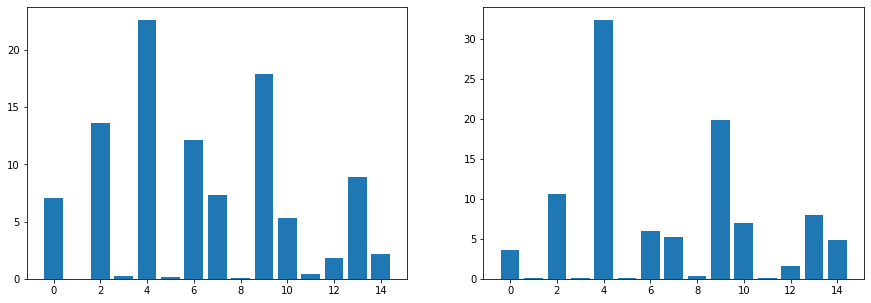

In [43]:
avg_topics_all = get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=15)